Image batch shape: torch.Size([4, 3, 32, 32])
Labels: tensor([1, 1, 3, 5])


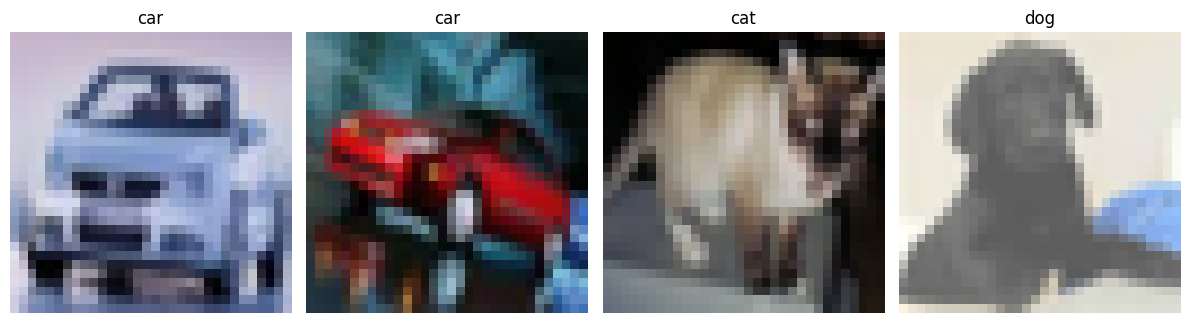

In [1]:
import os
import ssl

os.environ['CURL_CA_BUNDLE'] = ''
os.environ['REQUESTS_CA_BUNDLE'] = ''

ssl._create_default_https_context = ssl._create_unverified_context

import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(), #converting images to PyTorch format
])

print("Downloading CIFAR-10 dataset...")
train_dataset = datasets.CIFAR10(
    root='../data', #where to save it
    train=True, #get training data
    download=False, #download if not already there
    transform=transform #apply image processing
)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True) #4 images given at random

dataiter = iter(train_loader)
images, labels = next(dataiter) #next 4 batches given, 

print(f"Image batch shape: {images.shape}") #image
print(f"Labels: {labels}")

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ] #creates a lookup table

fig, axes = plt.subplots(1, 4, figsize=(12, 13)) #create 1 row, 4 columns of plots
for i in range(4):
    img = images[i].permute(1, 2, 0).numpy() #rearrange data format for display - pyTorch use [Channels, Height, Width]
    axes[i].imshow(img) #display image 
    axes[i].set_title(f"{classes[labels[i]]}") #add label above
    axes[i].axis('off') #hide axis numbers
plt.tight_layout()
plt.show()



In [ ]:
class SimpleAttention(nn.Module):
    """
    Simple self-attention mechanism to understand the basics.
    This is what Vision Transformers use to let image patches "look at" each other.
    """

    def __init__(self, dim, num_heads=4):
        super().__init__()
        self.num_heads = num_heads #number of attention experts
        self.dim = dim #feature vectors of each patch
        self.head_dim = dim // num_heads

        self.qkv = nn.Linear(dim, dim * 3) #linear layer (performs affine transformation), creates QKV
        self.proj = nn.Linear(dim, dim) #refines the result

    def forward(self, x):
        B, N, C = X.shape

        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim)
        